In [ ]:
### Carwyn Collinsworth
# Stony Brook University
# CSE353 Assignment 6 - Problem 1: Nonlinear Transform and Overfitting/Underfitting
# Professor Yin

In [ ]:
# Imports

# Firstly we need pandas to load the dataset in to our notebook
import pandas as pd
# Import numpy to work with matricies (transpose, multiply, etc.)
import numpy as np
# Import matplotlib.pyplot to chart results at the end
import matplotlib.pyplot as plt

In [ ]:
# Mount google drive for reading from datafiles
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define global variables

# Note to Grader: Data directory must be changed for the appropriate location if testing code. TotalPath should point to the data directory.
totalPath = "/content/drive/MyDrive/Stony Brook/Classes/Year 3/Semester 1/CSE353 - Machine Learning/Assignment 6/data/"
xDataFileName = "TrainingData_x.txt"
yDataFileName = "TrainingData_y.txt"
xTestingData = "TestingData_x.txt"
yTestingData = "TestingData_y.txt"

In [ ]:
# First of all, we want to load the datasets in and get them into the correct format

# Load data
xdata = pd.read_csv(totalPath + xDataFileName, sep=",", header=None).to_numpy()
ydata = pd.read_csv(totalPath + yDataFileName, sep=",", header=None).to_numpy().T

# Reformat xdata
xdata = xdata.T
ydata = ydata.T

print("X Data: ", xdata.shape)
print(xdata)
print("Y Data: ", ydata.shape)
print(ydata)

# Let us also define our N : the number of elements in our dataset
N = xdata.size

# Our x array now has 1 row and 20 columns, y array has 20 rows, 1 column.

X Data:  (1, 20)
[[-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
   4.5  5.5  6.5  7.5  8.5  9.5]]
Y Data:  (20, 1)
[[-11.5732]
 [-11.4278]
 [ -5.8859]
 [  1.0129]
 [  1.5771]
 [ -1.6545]
 [  4.35  ]
 [  0.1487]
 [ -2.0709]
 [ -0.2259]
 [ -2.8502]
 [ -0.1564]
 [ -2.9034]
 [ -0.6933]
 [  4.4733]
 [  7.6149]
 [  2.6611]
 [  9.9052]
 [ 12.7065]
 [ 17.5163]]


In [ ]:
# Next, we want to transform our dataset along the guidelines of the question (i.e)
# z_n = phi_Q (X_n) = [1, x_n, x^2_n, x^3_n, x^4_n, ..., x^Q_n]
# Therefore, Q is the number of terms in our polynomial transform 
# (hence why it is called a Q-th order polynomial transform)

# Let us define the Q value we want to use
Q = 4

# So we create our Z matrix where Z = [z^T_1; z^T_2; ...; z^T_N]
Z = np.zeros((N,Q))

In [ ]:
# Now we want to fill our Z matrix with the correct z^T_n elements
# As is defined: Z = [z^T_1; z^T_2; ...; z^T_N]

for i in range(N):
  #calculate z^T_i
  #z_i = [1, x_i, x^2_i, x^3_i, x^4_i, ..., x^Q_i]

  # Initialize z_temp_i array
  z_temp_i = np.zeros((1,Q))
  # Fill array
  for j in range(Q):
    z_temp_i[0,j] = xdata[0,i]**j
  # Set array into Z
  Z[i,:] = z_temp_i

# Let us visualize our Z matrix (just the first row)
print(Z[0,:])
print("Shape of Z: " + str(Z.shape))

[   1.      -9.5     90.25  -857.375]
Shape of Z: (20, 4)


In [ ]:
# Next, we want to perform closed form linear regression on our transformed dataset
# This should follow the formula defined as:
# w_poly = [w_0, w_1, ..., w_Q]^T = (Z^T @ Z)^-1 @ Z^T@y

# Note that Z has a shape of (20,19),
# Therefore Z^T has a shape of (19,20),
# and y has a shape of (20,1)

w_poly = np.linalg.inv((np.transpose(Z) @ Z)) @ np.transpose(Z) @ ydata

# visualize w_poly, which should have shape (Q,1)
print(w_poly)
print(w_poly.shape)

[[-0.04434186]
 [-0.31645465]
 [ 0.03520502]
 [ 0.0216335 ]]
(4, 1)


In [ ]:
# Now that we have calculated w_poly, we need to calculate the testing error
# We use the formula err_sqr = sum_n=1^N (w^T_poly @ phi(x_n) - y_n)^2

# initialize err_sqr
err_sqr = 0

# calculate the error of each point and add it to this sum
for n in range(N):
  err_sqr += (np.transpose(w_poly) @ Z[n,:] - ydata[n])**2

print("Training Error: " + str(err_sqr))

Training Error: [112.73940321]


In [ ]:
# Testing error

# Set N for testing data
N = 40

# Load data
xTestdata = pd.read_csv(totalPath + xTestingData, sep=",", header=None).to_numpy()
yTestdata = pd.read_csv(totalPath + yTestingData, sep=",", header=None).to_numpy().T

# Reformat xdata
xTestdata = xTestdata.T
yTestdata = yTestdata.T

# So we create our Z matrix where Z = [z^T_1; z^T_2; ...; z^T_N]
Z_test = np.zeros((N,Q))

# Now we want to fill our Z matrix with the correct z^T_n elements
for i in range(N):
  # Initialize z_temp_i array
  z_temp_i = np.zeros((1,Q))
  # Fill array
  for j in range(Q):
    z_temp_i[0,j] = xTestdata[0,i]**j
  # Set array into Z
  Z_test[i,:] = z_temp_i

# initialize err_sqr
err_sqr_test = 0

# calculate the error of each point and add it to this sum
for n in range(N):
  err_sqr_test += (np.transpose(w_poly) @ Z_test[n,:] - yTestdata[n])**2

print("Testing Error: " + str(err_sqr_test))

Testing Error: [158.18832809]


In [ ]:
# Define our function for taking in x value and regressing to estimate y
def hypo_function(x):
  # generate phi(x)
  phi_x = np.zeros((1,Q))
  # Fill array
  for j in range(Q):
    phi_x[0,j] = x**j
  # Transpose phi_x
  phi_x = np.transpose(phi_x)
  return np.transpose(w_poly) @ phi_x

X data shape: (60,), X data in total:  [ -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5
   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5 -10.   -9.5  -9.   -8.5
  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5
  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5
   4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5]
Y data shape: (60,), Y data in total:  [-11.5732 -11.4278  -5.8859   1.0129   1.5771  -1.6545   4.35     0.1487
  -2.0709  -0.2259  -2.8502  -0.1564  -2.9034  -0.6933   4.4733   7.6149
   2.6611   9.9052  12.7065  17.5163 -17.8671 -12.4138  -8.7576  -9.1759
  -6.9053  -4.2335  -4.5035  -2.2198  -3.3647  -1.194    2.487   -2.3754
   1.2962   1.1436   2.7166   3.0523   0.4293   4.7032   3.5618   0.9979
  -2.5977  -0.8968   0.6179   0.3949   4.8337   4.3903  -1.3708   1.4578
   0.4299   0.3599   3.2461   1.356    3.2965   3.943    4.7786   8.9494
  10.2106  13.6788  16.8569  15.0925]
X data 

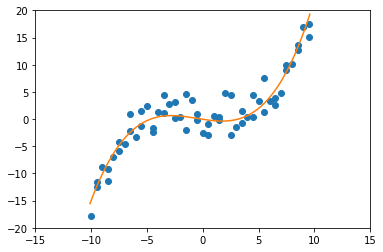

In [ ]:
# Plot the training and testing sample points, and the estimated curve
# Equation for hypothesis curve: g(x) = w_poly^T @ phi(x)

# Create array that is the conglomeration of test and train for both x,y
x_plot = np.concatenate((xdata[0], xTestdata[0]));
print("X data shape: " + str(x_plot.shape) + ", X data in total: ", x_plot)

y_plot = np.concatenate((ydata[:,0],yTestdata[:,0]))
print("Y data shape: " + str(y_plot.shape) + ", Y data in total: ", y_plot)

plt.plot(x_plot, y_plot, 'o')

# Find the range of x data
min_xdata = min(x_plot)
max_xdata = max(x_plot)
print("X data totality ranges from " + str(min_xdata) + " to " + str(max_xdata))

x_hypothesis_function = np.linspace(min_xdata - .1,max_xdata + .1, 200)
y_hypothesis_function = np.zeros((1,x_hypothesis_function.size))

# fill y data hypothesis function
for i in range(x_hypothesis_function.size):
  y_hypothesis_function[0,i] = hypo_function(x_hypothesis_function[i])

# Reformat data for visualization
y_hypothesis_function = np.ravel(y_hypothesis_function[0,:])
print(y_hypothesis_function[100:120])

# Set plot ranges
plt.xlim(-15, 15)
plt.ylim(-20, 20)

plt.plot(x_hypothesis_function,y_hypothesis_function)

In [ ]:
### The below comments are respective to the order of Q values I tried. This
# can be changed above in the 6th block to test different Q values.

# So that the comments below make sense, the order of Q values I tested was:
# 19
# 10
# 5
# 2

# Screenshots will be shown in the accompanying document

In [ ]:
### Note that the chart uses a Q of 19. That means that we are using a very
# high order polynomial expression to represent these points, likely causing
# the overfitting that we see here. We can also verify this by the chart
# going crazy (shooting up and down just past our dataset), representing the lack
# of ability of our algorithm to generalize.

# The training accuracy was 3, and the testing was 5*10^8
# This is typical for overfitting.

In [ ]:
### Using a lower Q value will likely flatten the curve, allowing it to generalize
# better, and giving us lower error values.

# For a Q of 10:
# The polynomial generalizes much better than Q=19, and this is likely the highest 
# testing accuracy we will achieve at 674 (training is 61).

# However, we still see lack of generalization as at the lower bound of our dataset,
# the curve shoots up. This means it is still likely overfitting.

In [ ]:
# For a Q of 5:
# Training accuracy is 97 and testing accuracy is 205.
# This curve is one of the best I was able to produce (other than Q=4), and 
# doesn't show strong signs of # overfitting or underfitting, although I would 
# like to see a little closer testing and training accuracy.

In [ ]:
# For a Q of 2:
# Training accuracy is 341 and testing accuracy is 558.
# This curve is oversimplified, and is underfitting. It is a linear line, and 
# it does not capture the complexity of the data.

In [ ]:
 # Note that a Q of 3 is quadratic and has the same analysis as Q=2.

 # Q=4 has a training error of 112 and testing of 158. This is the best
 # model I was able to produce. It perfectly captures the complexity of the data,
 # without overfitting. It also has the lowest error of all Q values.